In [2]:
# Importing libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading data
data = load_dataset("lukebarousse/data_jobs")
df = data['train'].to_pandas()

# Cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x)if pd.notna(x) else x)

c:\Users\Namitha john\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [4]:
df_da_us = df_da_us.dropna(subset = ['salary_year_avg'])
df_da_us_exploded = df_da_us.explode('job_skills')

In [5]:
df_skills = df_da_us_exploded.groupby('job_skills')['salary_year_avg'].agg(['median','count']).sort_values(by='count',ascending=False)
df_skills = df_skills.rename(columns={'count':'skill_count' , 'median': 'median_salary'})

da_job_count = len(df_da_us)
df_skills['skill_percent'] = (df_skills['skill_count']/da_job_count) *100
skill_percent = 5
df_skills = df_skills[df_skills['skill_percent'] > skill_percent]
df_skills

,median_salary,skill_count,skill_percent
job_skills,,,
sql,91000.00,2508,57.655172
excel,84392.00,1808,41.563218
python,97500.00,1431,32.896552
tableau,92875.00,1364,31.356322
sas,90000.00,926,21.287356
r,92500.00,893,20.528736
power bi,90000.00,838,19.264368
powerpoint,85000.00,462,10.620690
word,81194.75,461,10.597701


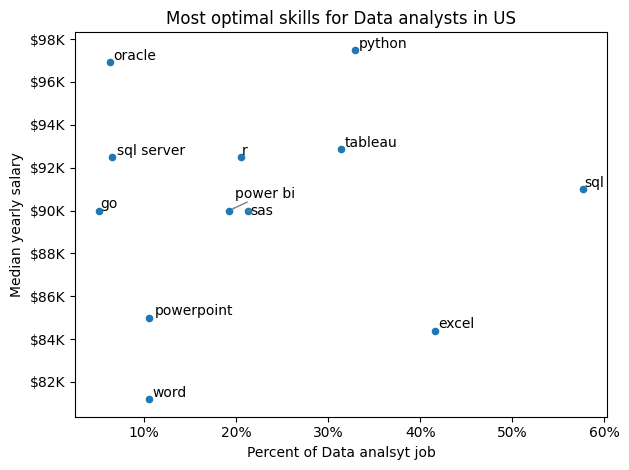

In [6]:
from adjustText import adjust_text

df_skills.plot(kind = 'scatter',x = 'skill_percent', y= 'median_salary')
ax =plt.gca()

texts = []
for i,text in enumerate(df_skills.index):
    texts.append(plt.text(df_skills['skill_percent'].iloc[i],df_skills['median_salary'].iloc[i],text))  
adjust_text(texts,arrowprops = dict(arrowstyle= '->', color = 'gray'))


from matplotlib.ticker import PercentFormatter    
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K'))   
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Percent of Data analsyt job')
plt.ylabel('Median yearly salary')
plt.title('Most optimal skills for Data analysts in US')
plt.tight_layout()

In [7]:
df_technology = df['job_type_skills'].copy()
df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()
df_technology

1         {'analyst_tools': ['power bi', 'tableau'], 'pr...
2         {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3         {'cloud': ['aws'], 'libraries': ['tensorflow',...
4         {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5         {'cloud': ['gcp'], 'programming': ['python', '...
                                ...                        
785697    {'analyst_tools': ['power bi', 'tableau', 'wor...
785721    {'analyst_tools': ['looker', 'tableau', 'splun...
785725    {'cloud': ['bigquery'], 'libraries': ['gdpr'],...
785735    {'cloud': ['bigquery', 'aws'], 'libraries': ['...
785736    {'os': ['linux', 'unix'], 'other': ['kubernete...
Name: job_type_skills, Length: 177562, dtype: object

In [8]:
technology_dict = {}

for row in  df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] =value

for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))
technology_dict

            

{'analyst_tools': ['sap',
  'visio',
  'word',
  'spreadsheet',
  'msaccess',
  'dax',
  'looker',
  'sheets',
  'excel',
  'ms access',
  'power bi',
  'powerpoint',
  'alteryx',
  'spss',
  'microstrategy',
  'sas',
  'datarobot',
  'esquisse',
  'splunk',
  'cognos',
  'nuix',
  'ssis',
  'tableau',
  'qlik',
  'powerbi',
  'ssrs',
  'sharepoint',
  'outlook'],
 'programming': ['t-sql',
  'shell',
  'lua',
  'python',
  'c++',
  'sass',
  'f#',
  'mongo',
  'objective-c',
  'haskell',
  'typescript',
  'powershell',
  'lisp',
  'perl',
  'bash',
  'assembly',
  'scala',
  'html',
  'matlab',
  'julia',
  'cobol',
  'no-sql',
  'c#',
  'visual basic',
  'java',
  'ruby',
  'clojure',
  'fortran',
  'delphi',
  'visualbasic',
  'sql',
  'apl',
  'css',
  'sas',
  'r',
  'vb.net',
  'groovy',
  'php',
  'javascript',
  'crystal',
  'c',
  'dart',
  'rust',
  'ocaml',
  'go',
  'mongodb',
  'vba',
  'solidity',
  'elixir',
  'kotlin',
  'nosql',
  'erlang',
  'pascal',
  'swift',
  'gol

In [9]:
df_technology = pd.DataFrame(list(technology_dict.items()),columns=['technology','skills'])
df_technology =df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,sap
0,analyst_tools,visio
0,analyst_tools,word
0,analyst_tools,spreadsheet
0,analyst_tools,msaccess
...,...,...
9,sync,ringcentral
9,sync,slack
9,sync,mattermost
9,sync,webex


In [10]:
df_plot = df_skills.merge(df_technology,left_on='job_skills',right_on='skills')

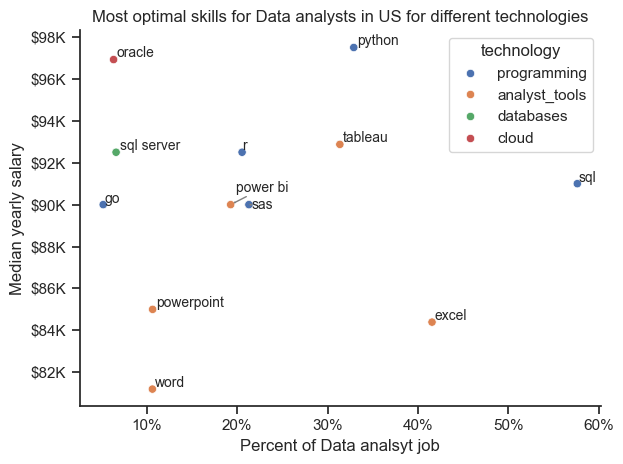

In [12]:
from adjustText import adjust_text

#df_plot.plot(kind = 'scatter',x = 'skill_percent', y= 'median_salary')
sns.scatterplot(data= df_plot, x='skill_percent', y = 'median_salary', hue = 'technology')
sns.despine()
sns.set_theme(style='ticks')

texts = []
for i,text in enumerate(df_skills.index):
    texts.append(plt.text(df_skills['skill_percent'].iloc[i],df_skills['median_salary'].iloc[i],text,fontsize= 10))  
adjust_text(texts,arrowprops = dict(arrowstyle= '->', color = 'gray'))


from matplotlib.ticker import PercentFormatter    
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K'))   
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Percent of Data analsyt job')
plt.ylabel('Median yearly salary')
plt.title('Most optimal skills for Data analysts in US for different technologies')
plt.tight_layout()